# Análise de dados

## Métricas

Taxa de transmissão média

## Parâmetros fixados

- Links ethernet 1 Gbps
- Links entre PC e roteador com BER 0
- Janela padrão do TCP
- Tráfego de background somente UDP

## Fatores e níveis

- Algoritmo de congestionamento
    - Cubic
    - Reno
- BER entre os roteadores 1 e 2
    - 1e-5
    - 1e-6
- Delay no link entre roteadores
    - 10ms
    - 100ms
- Tráfego de background
    - 10 Mbps
    - 500 Mbps

## Técnicas utilizadas

Simulação com IMUNES e iperf

## Importando bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Amostra dos dados

In [67]:
dados = pd.read_csv('data/dados.csv')
dados

,REPETICAO,PROTOCOLO,BER,DELAY,BANDA UDP,TIMESTAMP,IP PC1,PORTA PC1,IP PC2,PORTA PC2,ID,INTERVALO,TAXA DE TRANSFERENCIA,BANDA TCP
0,0,cubic,1000000,10000,10M,20240322130834,10.0.2.20,40972,10.0.0.20,5001,3,0.0-10.0,71827456,57242177
1,0,cubic,1000000,100000,10M,20240322130848,10.0.2.20,51456,10.0.0.20,5001,3,0.0-11.3,9437184,6682812
2,0,cubic,100000,10000,10M,20240322130900,10.0.2.20,57884,10.0.0.20,5001,3,0.0-10.2,3538944,2787713
3,0,cubic,100000,100000,10M,20240322130916,10.0.2.20,41390,10.0.0.20,5001,3,0.0-13.0,786432,485438
4,0,reno,1000000,10000,10M,20240322130929,10.0.2.20,55094,10.0.0.20,5001,3,0.0-10.8,32636928,24181939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,7,cubic,100000,100000,500M,20240322133620,10.0.2.20,39206,10.0.0.20,5001,3,0.0-14.1,1815792,1032665
124,7,reno,1000000,10000,500M,20240322133632,10.0.2.20,39074,10.0.0.20,5001,3,0.0-10.2,97517568,76701281
125,7,reno,1000000,100000,500M,20240322133649,10.0.2.20,47434,10.0.0.20,5001,3,0.0-14.2,8777776,4933624
126,7,reno,100000,10000,500M,20240322133702,10.0.2.20,52354,10.0.0.20,5001,3,0.0-10.4,6160384,4731917


## Cenários

Compararemos os algoritmos de congestionamento Cubic e Reno variando cada um dos 3 outros fatores em 2 níveis, totalizando 8 cenários de comparação.

### Cenário 1
- Tráfego UDP 10 Mbps
- BER 1e-5
- Delay 10ms

Média da taxa do algoritmo cubic: 4.29 Mbps
Média da taxa do algoritmo reno: 4.6 Mbps


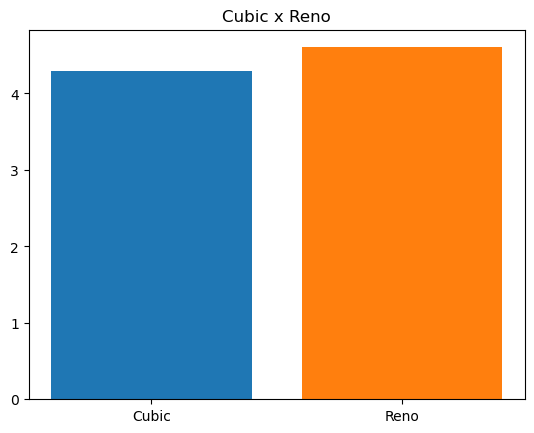

In [68]:
dados_cenario = dados[(dados['BANDA UDP'] == '10M') & (dados['BER'] == 100000) & (dados['DELAY'] == 10000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 2
- Tráfego UDP 10 Mbps
- BER 1e-5
- Delay 100ms

Média da taxa do algoritmo cubic: 1.22 Mbps
Média da taxa do algoritmo reno: 1.16 Mbps


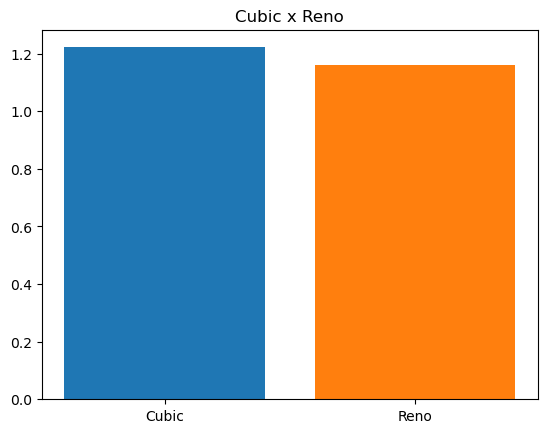

In [69]:
dados_cenario = dados[(dados['BANDA UDP'] == '10M') & (dados['BER'] == 100000) & (dados['DELAY'] == 100000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 3
- Tráfego UDP 10 Mbps
- BER 1e-6
- Delay 10ms

Média da taxa do algoritmo cubic: 75.8 Mbps
Média da taxa do algoritmo reno: 53.6 Mbps


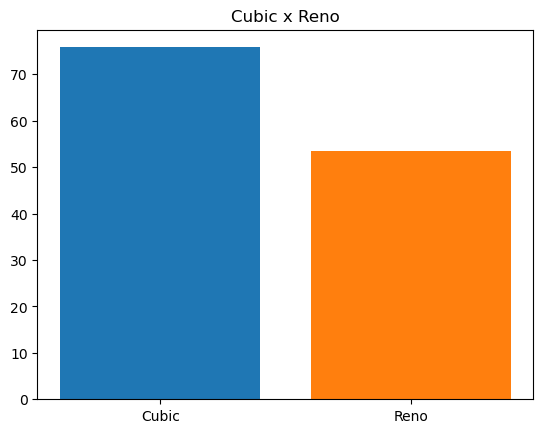

In [70]:
dados_cenario = dados[(dados['BANDA UDP'] == '10M') & (dados['BER'] == 1000000) & (dados['DELAY'] == 10000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 4
- Tráfego UDP 10 Mbps
- BER 1e-6
- Delay 100ms

Média da taxa do algoritmo cubic: 15.2 Mbps
Média da taxa do algoritmo reno: 13.5 Mbps


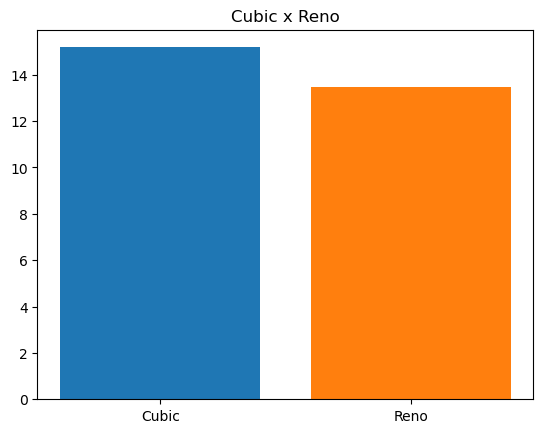

In [71]:
dados_cenario = dados[(dados['BANDA UDP'] == '10M') & (dados['BER'] == 1000000) & (dados['DELAY'] == 100000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 5
- Tráfego UDP 500 Mbps
- BER 1e-5
- Delay 10ms

Média da taxa do algoritmo cubic: 5.08 Mbps
Média da taxa do algoritmo reno: 4.31 Mbps


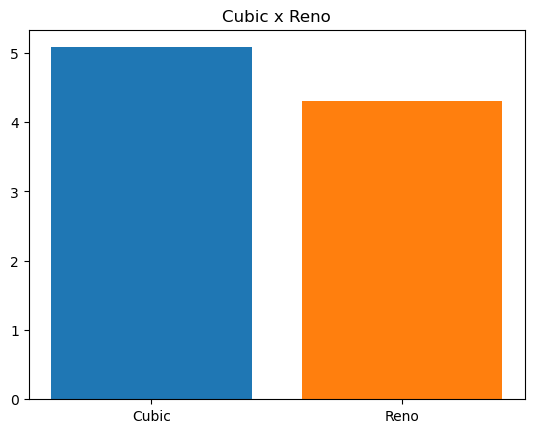

In [72]:
dados_cenario = dados[(dados['BANDA UDP'] == '500M') & (dados['BER'] == 100000) & (dados['DELAY'] == 10000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 6
- Tráfego UDP 500 Mbps
- BER 1e-5
- Delay 100ms

Média da taxa do algoritmo cubic: 2.07 Mbps
Média da taxa do algoritmo reno: 1.07 Mbps


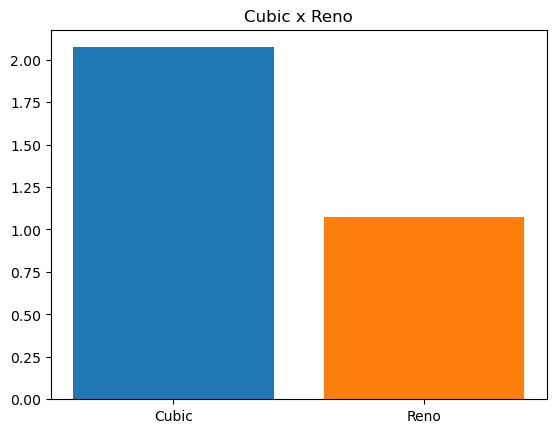

In [73]:
dados_cenario = dados[(dados['BANDA UDP'] == '500M') & (dados['BER'] == 100000) & (dados['DELAY'] == 100000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenaŕio 7
- Tráfego UDP 500 Mbps
- BER 1e-6
- Delay 10ms

Média da taxa do algoritmo cubic: 49.7 Mbps
Média da taxa do algoritmo reno: 79.1 Mbps


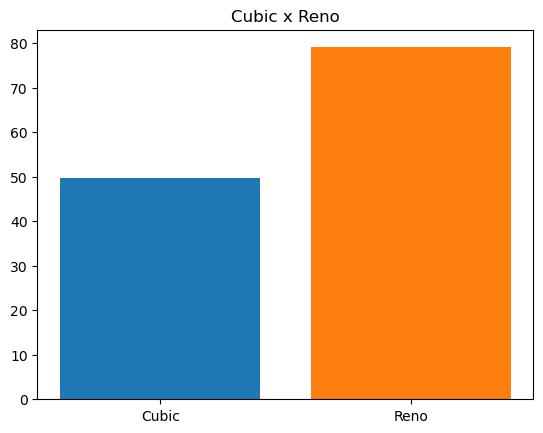

In [74]:
dados_cenario = dados[(dados['BANDA UDP'] == '500M') & (dados['BER'] == 1000000) & (dados['DELAY'] == 10000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()

### Cenário 8
- Tráfego UDP 500 Mbps
- BER 1e-6
- Delay 100ms

Média da taxa do algoritmo cubic: 12.6 Mbps
Média da taxa do algoritmo reno: 5.51 Mbps


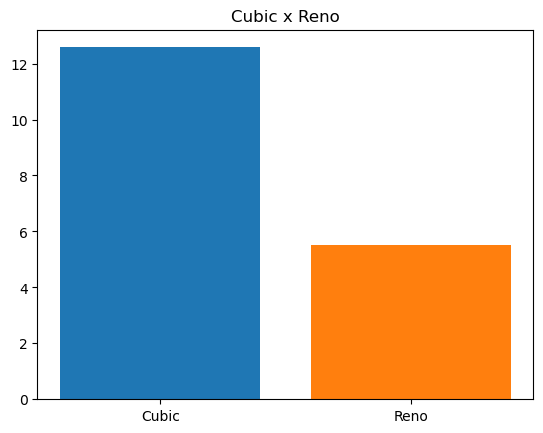

In [75]:
dados_cenario = dados[(dados['BANDA UDP'] == '500M') & (dados['BER'] == 1000000) & (dados['DELAY'] == 100000)]
dados_cenario_cubic = dados_cenario[dados_cenario['PROTOCOLO'] == 'cubic']
dados_cenario_reno = dados_cenario[dados_cenario['PROTOCOLO'] == 'reno']
cubic_taxa_media = dados_cenario_cubic['TAXA DE TRANSFERENCIA'].mean()/1000000
reno_taxa_media = dados_cenario_reno['TAXA DE TRANSFERENCIA'].mean()/1000000
print(f"Média da taxa do algoritmo cubic: {cubic_taxa_media:.3} Mbps")
print(f"Média da taxa do algoritmo reno: {reno_taxa_media:.3} Mbps")
plt.bar("Cubic",cubic_taxa_media)
plt.bar("Reno",reno_taxa_media)
plt.title('Cubic x Reno')
plt.show()